# Statistics and Probability: Fundamentals

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Standardisation

We consider the grades dataset, which contains Physics, Biology and Maths scores for 26 students:

In [18]:
grades.shape

(26, 6)

In [3]:
grades = pd.read_csv("data/grades.csv")
grades.agg(["mean", "var", "std"])

,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


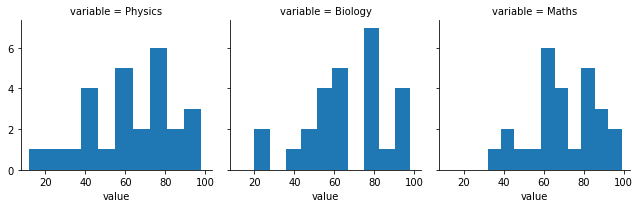

In [10]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value");

Suppose the instructor wanted to provide the students with an idea of how well they are performing relative to their peers, but not their exact score. This can be done by **standardising** the scores. This is done by subtracting the mean and re-scaling the data to be in standard deviations.  

In [13]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [14]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


What can we conclude? 

Firstly, Arnold and Emily are above average Physics students, whereas Bob, Cassandra and Donovan are below average. 

But there's more we can say! Emily's scores are **1.5 standard deviations above the mean**, whereas Cassandra's scores are **1.3 standard deviations above the mean**. 

More importantly, standardisation allows us to compare the results from different exams. Standardisation allows each of the variables to be expressed in common units: their respective standard deviation. 

We can do the same for Math scores, which have a lower variance than Physics scores: 

In [16]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


What do we observe? 

 - While Arnold is doing really well in Physics, he's barely above average in Maths. 
 - Bob, Cassandra and Donovan are below average in both Physics and Maths. 
 - While Emily seems to be an above average Physics student, she's quite the opposite when it comes to Maths. 

# Fundamentals of Probability

For your reference, the rules of probability are reproduced as follows: 
1. The probability of an event A is between 0 and 1 (inclusive): $0 \leq p(A)\leq 1$
2. The sum of the probability of all possible events (the *sample space*) is 1. $\Sigma^n_{i=0} p(A_i)=1$
3. The sum of the probability of an event and its complement is 1. $p(A^C)+p(A) = 1$
4. (Addition Rule) The probability of event A *or* event B happening is equal to the sum of the probabilities of event A and event B happening respectively, *less* the probability of event A **and** event B. $p(A \cup B)= p(A) + p(B) - p(AB)$
5. If events A and B are independent, then the probability of event A and B jointly occuring is the product of the probabilities of events A and B respectively. $p(AB) = p(A)p(B)$

<div class="alert alert-info">
📝 <b>Note:</b> Events A and B are independent if the occurence of event A doesn't change the probability of Event B occuring. Do not confuse this with <b>mutually exclusive</b> events. If events A and B are mutually exclusive (disjoint), they cannot both happen. 
</div>

## Conditional Probability 
|Sex/Handedness|Right handed| Left handed|
|--------------|-----------:|-----------:|
|Male          |43          | 9          |
|Female        |44          | 4          |

The contingency table above summarises some fake data collected from 100 respondents on genders and handedness. 

**What is the probability that any one respondent in our survey is female?** To calculate the probability, divide the number of events by the sample space: $\frac{44+4}{100}=.48$. It is a little more likely that our respondents are male than female. 

However, what is the probability that a female in our sample is **left-handed**? Quite unlikely. To quantify the likelihood, we could divide the number of left-handed females by the number of females in our sample: $\frac{4}{48}=\frac{1}{12}$. 

$\frac{1}{12}$ is a **conditional probability**: a probability under a condition. Note that to calculate the conditional probability, we restrict the sample space under consideration to a condition, and then recalculate the probability as if the condition were the entire sample space. 

A general formula for conditional probability is as follows. The conditional probability of A given B is 

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$

We take the joint probability $P(A\cap B)$ and 'inflate' it with the probability of $P(B)$. 

Conditional probabilities are fundamental to the idea of **independence**. Recall that we defined independence of two events A and B as 

> the probability of event A is not changed by the occurence of event B. 

We can restate the statement above as 

$$P(A|B)=P(A)$$

Consider whether handedness is independent of sex. The probability of being left-handed is $11/100$, or 0.11. As you might expect, it's close to the conditional probability $P(left$-$handed|female)=0.12$.